# Perceptron Notebook

In [51]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import random
import numpy as np
import matplotlib.pyplot as plt

# Method for generating dataset

In [52]:
def generateDataset(mu,sigma,n,value):
    label = [0] * n
    for i in range(n):
        label[i] = [random.gauss(mu,sigma),random.gauss(mu,sigma),random.gauss(mu,sigma),value]
    return label

# Plotting the Dataset

<IPython.core.display.Javascript object>


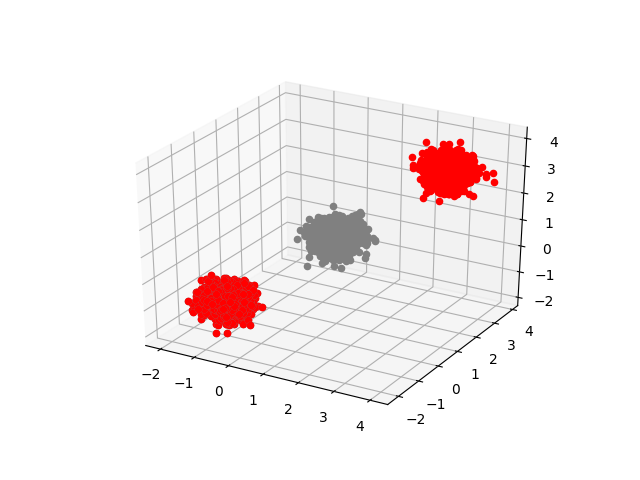

In [54]:
label0 = generateDataset(1, 0.3,1000,0)
label1 = generateDataset(-1, 0.3, 1000,1)
label2 = generateDataset(3, 0.3, 1000,2)
data_merge = label0 + label1 + label2
original_data = label0 + label1 + label2
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(data_merge)-1000):   
    ax.scatter3D(data_merge[i][0],data_merge[i][1],data_merge[i][2],c='gray',cmap="Greens")
for i in range(1000,len(data_merge)):   
    ax.scatter3D(data_merge[i][0],data_merge[i][1],data_merge[i][2],c='red',cmap="Greens")
np.random.shuffle(data_merge)

# Predicting the output

In [55]:
def predict(inputs, weights):
    activation = 0.0
    summation = 0
    for i in range(len(weights)-1):
        if (i == 0):
            summation+=weights[i]
        summation += inputs[i] * weights[i+1] ;
    if summation >= activation:
        return 1
    else:
        return 0

# Validate the dataset

In [56]:
def validateDataSet(dataset,weights):
    error_rate = 0
    total_error = 0.0
    for i in range(1601,len(dataset)):
        p_out = predict(dataset[i],weights)
        error_rate = (dataset[i][-1] - p_out)
        if(error_rate != 0):
            total_error += 1;
    return total_error;    

# Plotting error rate for validation set

In [57]:
def plotErrorRate(error):
    %matplotlib  notebook
    epoch = np.linspace(1,len(error),len(error))
    fig = plt.figure()
    plt.plot(epoch, error)
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate Training')
    plt.title('Perceptron Convergence')

# Plotting the error rate

In [58]:
def plotErrorRateValidate(error):
    epoch = np.linspace(1,len(error),len(error))
    fig = plt.figure()
    plt.plot(epoch, error)
    plt.xlabel('Epoch')
    plt.ylabel('Error Rate Validaton')
    plt.title('Perceptron Convergence')
    plt.show()

# Method for training the perceptron

In [59]:
def train(dataset, l_rate, epochs):
    w = np.zeros(len(dataset[0]))
    error_rate = 0
    erEpoch = [];
    erEpochVal = [];
    for epoch in range(epochs):
        total_error = 0.0
        for i in range(len(dataset)-401):
            p_out = predict(dataset[i],w)
            error_rate = (dataset[i][-1] - p_out)
            if(error_rate != 0):
                total_error += 1;
            for j in range(len(w)-1):
                if(j == 0):
                    w[j] += l_rate * error_rate;
                w[j+1] += (l_rate * error_rate * dataset[i][j]);
        erEpoch.append(total_error);
        erEpochVal.append(validateDataSet(dataset,w));
    return w,erEpoch,erEpochVal

# Plotting the error rate

<IPython.core.display.Javascript object>


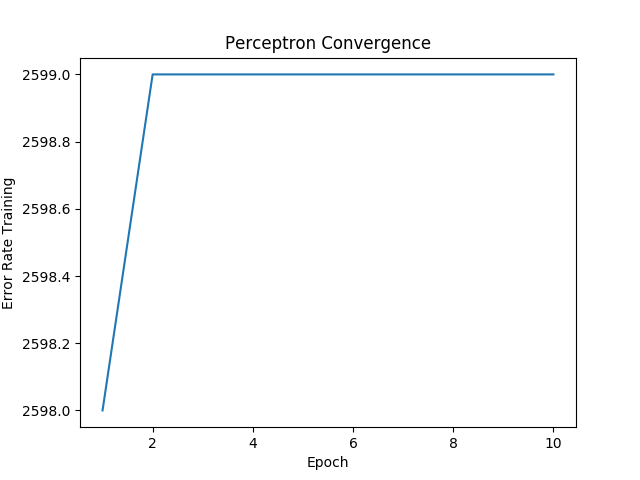

In [60]:
we,error,erEpochval=train(data_merge,0.1,10)
plotErrorRate(error)

# Plotting error rate for validatation dataset 

<IPython.core.display.Javascript object>


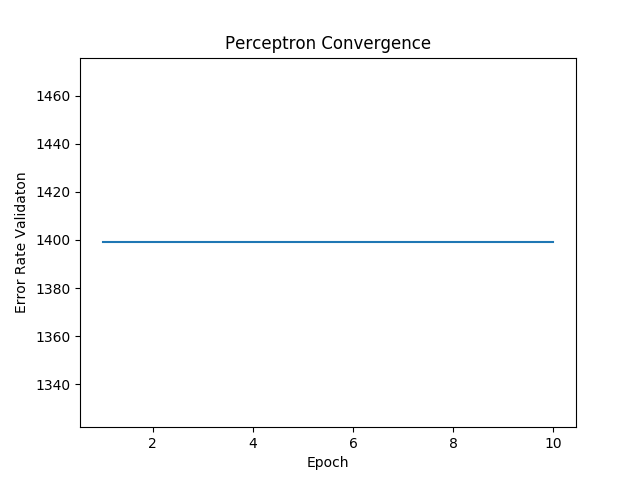

In [61]:
plotErrorRateValidate(erEpochval)

<IPython.core.display.Javascript object>


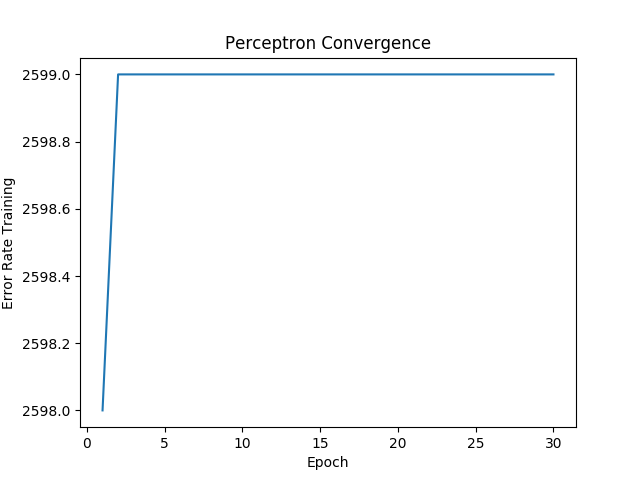

<IPython.core.display.Javascript object>


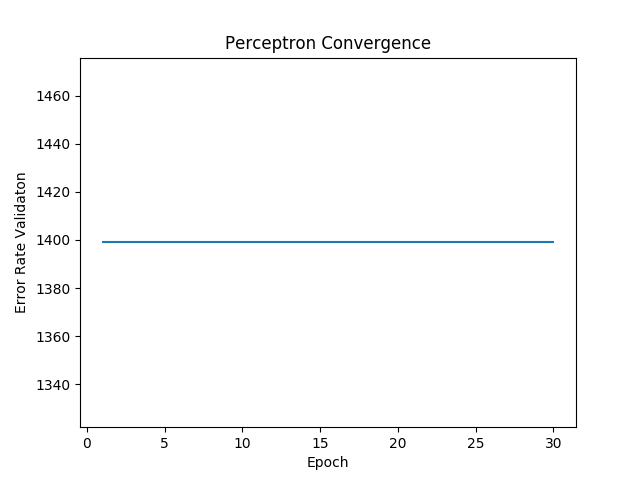

In [62]:
we,error,erEpochval=train(data_merge,0.3,30)
plotErrorRate(error)
plotErrorRateValidate(erEpochval)

<IPython.core.display.Javascript object>


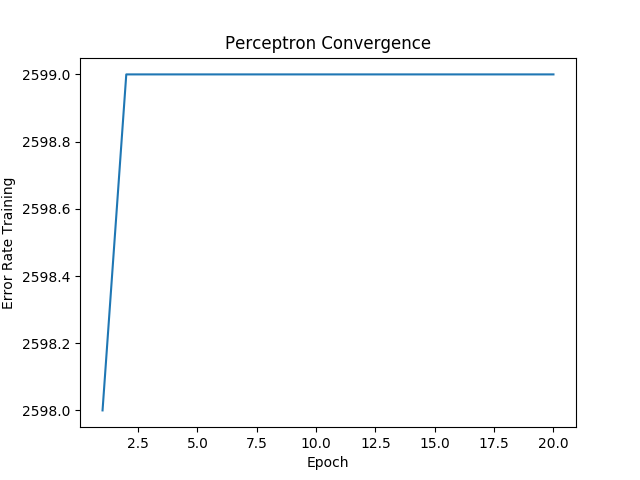

<IPython.core.display.Javascript object>


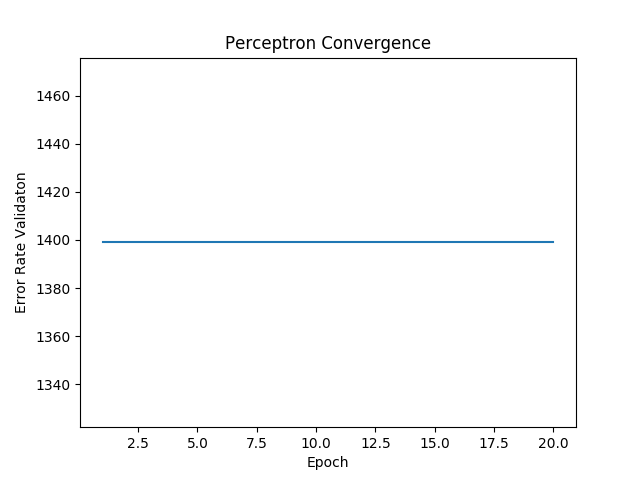

In [63]:
we,error,erEpochval=train(data_merge,0.5,20)
plotErrorRate(error)
plotErrorRateValidate(erEpochval)

# Method to plot the hyperplane

In [94]:
def plotHyperplane():
    xValue = np.linspace(-2,2,100)
    yValue = np.linspace(-2,2,100)
    
    xValue1 = np.linspace(-4,4,100)
    yValue1 = np.linspace(-4,4,100)

    XVal,YVal = np.meshgrid(xValue,yValue)
    XVal1,YVal1 = np.meshgrid(xValue1,yValue1)
    ZVal= -we[0]/we[3]*XVal - we[1]/we[3]*YVal
    ZVal1= -we[1]/we[3]*XVal1 - we[2]/we[3]*YVal1

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surface = ax.plot_surface(XVal, YVal, ZVal)
    surface2 = ax.plot_surface(XVal1, YVal1, ZVal1)

    for i in range(len(original_data)-1000):   
        ax.scatter3D(original_data[i][0],original_data[i][1],original_data[i][2],c='gray',cmap="Greens")
    for i in range(1000,len(original_data)):   
        ax.scatter3D(original_data[i][0],original_data[i][1],original_data[i][2],c='red',cmap="Greens")


# Plotting the hyperplane

<IPython.core.display.Javascript object>


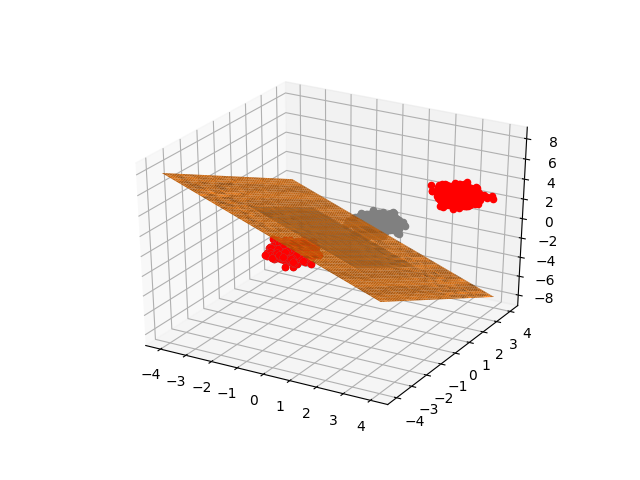

In [95]:
plotHyperplane()

# Shuffling the dataset

<IPython.core.display.Javascript object>


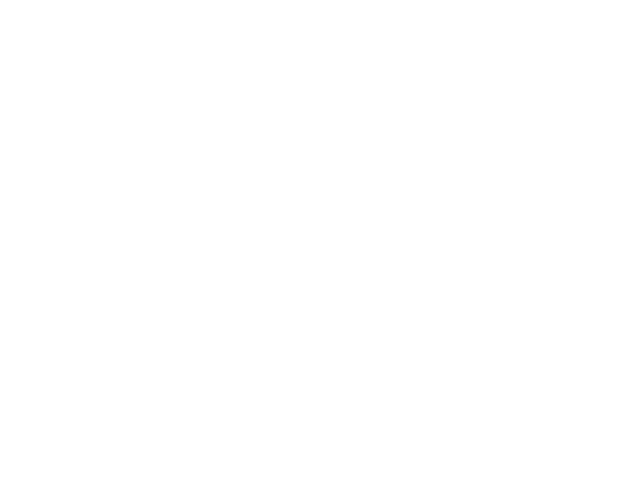

In [47]:
failToConverge0 = generateDataset(1, 0.1,1000,0)
failToConverge1 = generateDataset(1.1, 0.1, 1000,1)
merged_list1 = failToConverge0 + failToConverge1
original_data1 = failToConverge0 + failToConverge1
fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(merged_list1)-1000):   
    ax.scatter3D(merged_list1[i][0],merged_list1[i][1],merged_list1[i][2],c='gray',cmap="Greens")
for i in range(1000,len(merged_list1)):   
    ax.scatter3D(merged_list1[i][0],merged_list1[i][1],merged_list1[i][2],c='blue',cmap="Greens")
np.random.shuffle(merged_list1)


# Training on failed to converge dataset

In [48]:
we,error,erEpochval=train(merged_list1,0.1,10)

# Plotting the error rate for training dataset

<IPython.core.display.Javascript object>


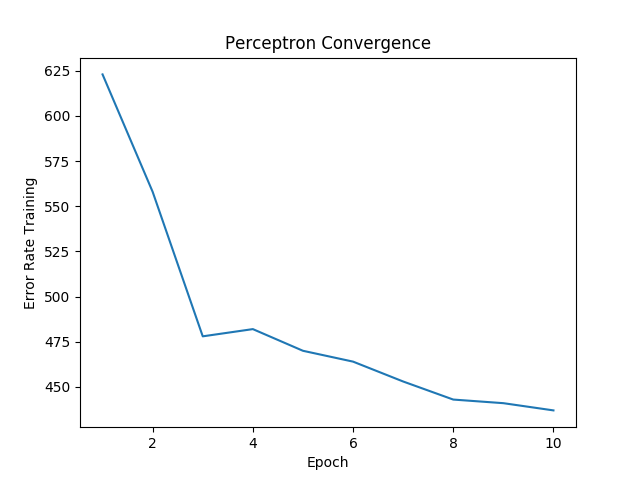

In [49]:
plotErrorRate(error)

# Plotting the error rate on validation dataset

<IPython.core.display.Javascript object>


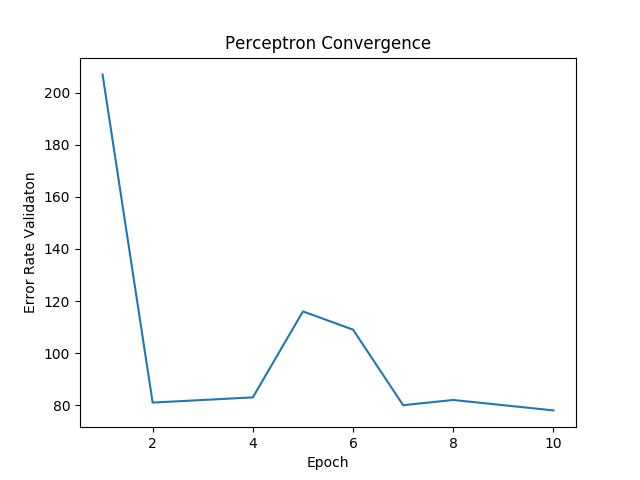

In [50]:
plotErrorRateValidate(erEpochval)